# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

Hong Kong is a famous tourist place where housing a wide choice of restaurants that offer cuisines from all over the world. 

As a result, the Hong Kong Food and Beverage industry is robust, with a strong market for the restaurant business. In order to set up a restaurant in Hong Kong investors will need to comply explore the different factors which could effect the business possibly.

So in my report I am going to focus on problems one might face while open a restaurant. Location, the type of restaurant will be the most important factor that I’d like to consider. 
We will use our data science powers to generate a few most promissing districtss based on this criteria. Advantages of each district will then be clearly expressed so that best possible final location can be chosen by stakeholders. As result, I will later concentrate on the districts and different type of restaurant, where the busiest venues of Hong Kong can be found to be optimal place to open the restaurant potentialy. 

## Data Preparation <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:

1. Top 10 Population Density in Hong Kong
2. The type und number of restaurant in each district in Hong Kong.



## Methodology

I decided to use https://en.wikipedia.org/wiki/Districts_of_Hong_Kong to define the Information of each district.
Following data sources will be needed to extract/generate the required information:

number of restaurants and their type and location in every district will be obtained using Foursquare API

### 1.1 Let's first find the districts in Hong Kong

In [60]:
import requests
website_url = requests.get('https://en.wikipedia.org/wiki/Districts_of_Hong_Kong').text

In [61]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

!pip install folium

import folium

# map rendering library

print('Libraries imported.')

Libraries imported.


In [62]:
import requests
import lxml
from bs4 import BeautifulSoup as bsoup
from urllib.request import urlopen as uReq
my_url='https://en.wikipedia.org/wiki/Districts_of_Hong_Kong'
r=requests.get(my_url)

# Parse the htlm with Soup
page=bsoup(r.text,"html.parser")
page

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Districts of Hong Kong - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c0679675-d6fb-4618-98e1-789d2f8cc6b3","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Districts_of_Hong_Kong","wgTitle":"Districts of Hong Kong","wgCurRevisionId":970753514,"wgRevisionId":970753514,"wgArticleId":151994,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","EngvarB from July 2014","Use dmy dates from July 2014","Articles containing Chinese-language text","Pages 

In [63]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Districts_of_Hong_Kong').text
soup = bsoup(response_obj,'lxml')
Districts_HongKong = soup.find('table',{'class':'wikitable'})
Districts_HongKong

<table class="wikitable sortable">
<tbody><tr>
<th>District
</th>
<th><a href="/wiki/Traditional_Chinese_characters" title="Traditional Chinese characters">Chinese</a>
</th>
<th>Population<sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[6]</a></sup>
</th>
<th>Area<br/>(km<sup>2</sup>)
</th>
<th>Density<br/>(/km<sup>2</sup>)
</th>
<th>Region
</th></tr>
<tr>
<td><a href="/wiki/Central_and_Western_District" title="Central and Western District"><span class="nowrap">Central and Western</span></a></td>
<td><span lang="zh-HK" title="Chinese language text">中西區</span></td>
<td align="right">244,600</td>
<td align="right">12.44</td>
<td align="right">19,983.92</td>
<td><span class="nowrap"><a href="/wiki/Hong_Kong_Island" title="Hong Kong Island">Hong Kong Island</a></span>
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Eastern_District_(Hong_Kong)" title="Eastern District (Hong Kong)">Eastern</a></td>
<td><span lang="zh-HK" title="Chinese language text">東區</span></td>
<td 

In [64]:
totals=Districts_HongKong.find_all('tr')
nrows=len(totals)
nrows

19

In [65]:
header=totals[0].text.split()
header

['District',
 'Chinese',
 'Population[6]',
 'Area(km2)',
 'Density(/km2)',
 'Region']

In [66]:
totals[5].text

'\nSham Shui Po\n深水埗區\n390,600\n9.35\n41,529.41\nKowloon\n'

In [67]:
totals[5].text.split('\n')

['', 'Sham Shui Po', '深水埗區', '390,600', '9.35', '41,529.41', 'Kowloon', '']

In [68]:
District=totals[5].text.split('\n')[3]
District

'390,600'

### 1.2 Extracting cells into a dataframe

In [108]:
records =[]
n=1
while n < nrows :
    District=totals[n].text.split('\n')[1]
    Areakm2=totals[n].text.split('\n')[4]
    Population=totals[n].text.split('\n')[3]
    records.append((District, Areakm2, Population))
    n=n+1

df1=pd.DataFrame(records, columns=['District', 'Areakm2', 'Population'])
df1.head(11)

,District,Areakm2,Population
0,Central and Western,12.44,"244,600"
1,Eastern,18.56,"574,500"
2,Southern,38.85,"269,200"
3,Wan Chai,9.83,"150,900"
4,Sham Shui Po,9.35,"390,600"
5,Kowloon City,10.02,"405,400"
6,Kwun Tong,11.27,"641,100"
7,Wong Tai Sin,9.30,"426,200"
8,Yau Tsim Mong,6.99,"318,100"
9,Islands,175.12,"146,900"


In [109]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


#### 1.3 To find the top 10 Population Density in Hong Kong

In [110]:
df1['Population'] = df1["Population"].str.replace(',', '').astype(float)

df1.head()


,District,Areakm2,Population
0,Central and Western,12.44,244600.0
1,Eastern,18.56,574500.0
2,Southern,38.85,269200.0
3,Wan Chai,9.83,150900.0
4,Sham Shui Po,9.35,390600.0


In [111]:
df1['Areakm2'] = df1["Areakm2"].str.replace(',', '').astype(float)

df1.head()

,District,Areakm2,Population
0,Central and Western,12.44,244600.0
1,Eastern,18.56,574500.0
2,Southern,38.85,269200.0
3,Wan Chai,9.83,150900.0
4,Sham Shui Po,9.35,390600.0


In [112]:
print (df1.dtypes)

District       object
Areakm2       float64
Population    float64
dtype: object


In [113]:
df1['Density'] = df1['Population']/df1['Areakm2']
# let's view the first five elements and see how the dataframe was changed
df1.head()

,District,Areakm2,Population,Density
0,Central and Western,12.44,244600.0,19662.379421
1,Eastern,18.56,574500.0,30953.663793
2,Southern,38.85,269200.0,6929.214929
3,Wan Chai,9.83,150900.0,15350.966429
4,Sham Shui Po,9.35,390600.0,41775.401070


In [116]:
df1.set_index('District', inplace=True)
# let's view the first five elements and see how the dataframe was changed
df1.head()

,Areakm2,Population,Density
District,,,
Islands,175.12,146900.0,838.853358
Tai Po,136.15,307100.0,2255.600441
North,136.61,310800.0,2275.089671
Sai Kung,129.65,448600.0,3460.084844
Yuen Long,138.46,607200.0,4385.382060


In [119]:
# sort dataframe (descending)
df1.sort_values(by='Density', ascending=True, inplace=True)

# get top 10
df_top10 = df1['Density'].tail(10)
df_top10

District
Sha Tin                 9433.852423
Wan Chai               15350.966429
Central and Western    19662.379421
Kwai Tsing             21726.649529
Eastern                30953.663793
Kowloon City           40459.081836
Sham Shui Po           41775.401070
Yau Tsim Mong          45507.868383
Wong Tai Sin           45827.956989
Kwun Tong              56885.536823
Name: Density, dtype: float64

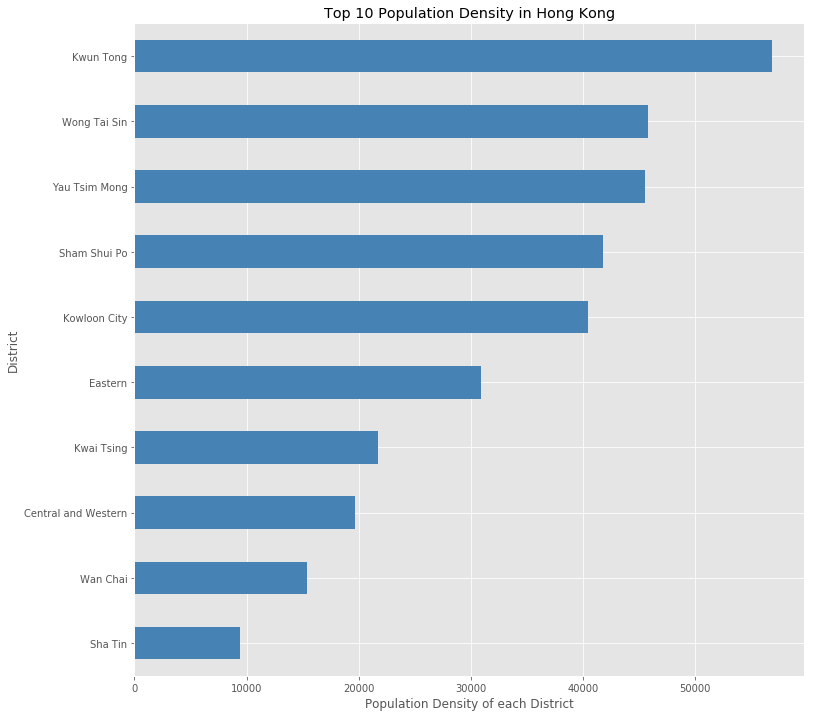

In [121]:

df_top10.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Population Density of each District')
plt.title('Top 10 Population Density in Hong Kong')

plt.show()

### 1.4 To find the latitude & longitude of each district

In [122]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,District,Latitude,Longitude
0,0,Central And Western,22.282150,114.15689
1,1,Eastern,22.284031,114.22422
2,2,Southern,22.247250,114.15884
3,3,Wan Chai,22.279680,114.17169
4,4,Sham Shui Po,22.330700,114.16216


### 1.5 now, we can obtain the final dataframe of districts in Hong Kong

In [126]:
df3 = pd.merge(df1,
                 df_data_1,how='right',
                 on='District')
del df3['Unnamed: 0']
df3.head(11)

,District,Areakm2,Population,Density,Latitude,Longitude
0,Islands,175.12,146900.0,838.853358,22.21037,114.02880
1,Tai Po,136.15,307100.0,2255.600441,22.45084,114.16422
2,North,136.61,310800.0,2275.089671,22.49471,114.13812
3,Sai Kung,129.65,448600.0,3460.084844,22.38154,114.27039
4,Yuen Long,138.46,607200.0,4385.382060,22.44557,114.02229
5,Tsuen Wan,61.71,303600.0,4919.786096,22.37463,114.11510
6,Tuen Mun,82.89,495900.0,5982.627579,22.39691,113.97441
7,Southern,38.85,269200.0,6929.214929,22.24725,114.15884
8,Sha Tin,68.71,648200.0,9433.852423,22.38716,114.19523
9,Wan Chai,9.83,150900.0,15350.966429,22.27968,114.17169


In [127]:
df3.shape

(18, 6)

## Analysis

### 2.1 My Foursquare Credentials

In [128]:
CLIENT_ID = 'S5MBTENR4ZLTIPFJDFON4R1SAGUD5PYKXN1P5NZMJ0FRY3FM' # your Foursquare ID
CLIENT_SECRET = 'DTW1UIU41Z3XNFZKO2BEP5FAVYEGUONELISOS5PJJ0HJ4NID' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: '+ CLIENT_ID )
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S5MBTENR4ZLTIPFJDFON4R1SAGUD5PYKXN1P5NZMJ0FRY3FM
CLIENT_SECRET:DTW1UIU41Z3XNFZKO2BEP5FAVYEGUONELISOS5PJJ0HJ4NID


In [129]:
from geopy.geocoders import Nominatim
address = "	99 Queen's Road Central, Central, Hong Kong "

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude =location.latitude   #8.079252 # location.latitude 
longitude =location.longitude #77.5499338 # location.longitude # 

HK='HongKong center location : {},{}'.format(latitude,longitude)
print(HK)

HongKong center location : 22.28365,114.15494


### 2.2  run the function on each dIstricts and create a new dataframe called Hong Kong_venues.

In [140]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 30000

In [141]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category' ]
    
    return(nearby_venues)

In [142]:
HongKong_venues = getNearbyVenues(names=df3['District'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude']
                                    )

Islands
Tai Po
North
Sai Kung
Yuen Long
Tsuen Wan
Tuen Mun
Southern
Sha Tin
Wan Chai
Kwai Tsing
Eastern
Kowloon City
Sham Shui Po
Yau Tsim Mong
Wong Tai Sin
Kwun Tong
Central And Western


In [143]:
print(HongKong_venues.shape)
HongKong_venues.head(15)

(673, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Islands,22.21037,114.0288,允升甜品,22.210678,114.028509,Dessert Shop
1,Islands,22.21037,114.0288,Hometown Teahouse,22.208929,114.030470,Asian Restaurant
2,Islands,22.21037,114.0288,Valor (啡寮),22.210610,114.028661,Coffee Shop
3,Islands,22.21037,114.0288,Cheung Kee (張記魚蛋粉麵),22.207660,114.028851,Chinese Restaurant
4,Islands,22.21037,114.0288,Tung Wan Beach (Tung Wan Beach 東灣海灘),22.209158,114.030702,Beach
5,Islands,22.21037,114.0288,甘永泰魚蛋,22.208597,114.029076,Snack Place
6,Islands,22.21037,114.0288,So Bor Kee Restaurant (So Bor Kee Restaurant 蘇波記),22.211227,114.027337,Chinese Restaurant
7,Islands,22.21037,114.0288,Cheung Chau Market (Cheung Chau Market 長洲街市),22.207054,114.028408,Market
8,Islands,22.21037,114.0288,New Baccarat Seafood Restaurant 新金湖海鮮菜館,22.211483,114.027034,Seafood Restaurant
9,Islands,22.21037,114.0288,Rainbow Café,22.209504,114.028680,Café


### 2.3 Number of venues per District

In [144]:
HongKong_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Central And Western,100,100,100,100,100,100
Eastern,13,13,13,13,13,13
Islands,22,22,22,22,22,22
Kowloon City,66,66,66,66,66,66
Kwai Tsing,5,5,5,5,5,5
Kwun Tong,63,63,63,63,63,63
North,8,8,8,8,8,8
Sai Kung,51,51,51,51,51,51
Sha Tin,13,13,13,13,13,13


### 2.4 Number of unique categories

In [145]:
print('The number of unique categories is {}.'.format(len(HongKong_venues['Venue Category'].unique())))

The number of unique categories is 149.


### 2.5 Analyzing Districts

In [146]:
# one hot encoding
HongKong_onehot = pd.get_dummies(HongKong_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
HongKong_onehot['District'] = HongKong_venues['District'] 

# move district column to the first column
cols=list(HongKong_onehot.columns.values)
cols.pop(cols.index('District'))
HongKong_onehot=HongKong_onehot[['District']+cols]

# rename Neighborhood for Districts so that future merge works
HongKong_onehot.rename(columns = {'District': 'District'}, inplace = True)
HongKong_onehot.head(15)

,District,African Restaurant,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Astrologer,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Store,Beijing Restaurant,Bistro,Bookstore,Bowling Alley,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Station,Bus Stop,Café,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Donburi Restaurant,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,History Museum,Hobby Shop,Hong Kong Restaurant,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Multiplex,Nightclub,Noodle House,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Salon / Barbershop,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Social Club,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Toy / Game Store,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Yoga Studio
0,Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Islands,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Islands,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [147]:
HongKong_onehot.shape

(673, 150)

#### Grouping rows by district and by the mean of the frequency of occurrence of each category

In [148]:
HongKong_grouped = HongKong_onehot.groupby('District').mean().reset_index()
HongKong_grouped

,District,African Restaurant,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Astrologer,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Store,Beijing Restaurant,Bistro,Bookstore,Bowling Alley,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Station,Bus Stop,Café,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Donburi Restaurant,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,History Museum,Hobby Shop,Hong Kong Restaurant,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Multiplex,Nightclub,Noodle House,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Salon / Barbershop,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Social Club,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Toy / Game Store,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Yoga Studio
0,Central And Western,0.000000,0.000000,0.02,0.01,0.010000,0.000000,0.000000,0.020000,0.020000,0.030000,0.000000,0.000000,0.01,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.020000,0.000000,0.000000,0.040000,0.000000,0.020000,0.03,0.030000,0.000000,0.000000,0.01,0.01,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.01,0.000000,0.000000,0.010000,0.000000,0.030000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.010000,0.000000,0.000,0.000000,0.01000,0.020000,0.000000,0.030000,0.050000,0.000000,0.01,0.000000,0.000000,0.020000,0.0000,0.01,0.030000,0.000000,0.000000,0.01,0.020000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.0,0.000000,0.020000,0.020000,0.000000,0.01,0.000000,0.000000,0.01,0.020000,0.000000,0.01,0.010000,0.000000,0.000000,0.000000,0.020000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.030000
1,Eastern,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.230769,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0

In [149]:
HongKong_grouped.shape

(18, 150)

#### Printing districts along with the top 5 most common venues

In [150]:
num_top_venues = 5

for hood in HongKong_grouped['District']:
    print("----"+hood+"----")
    temp = HongKong_grouped[HongKong_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central And Western----
                 venue  freq
0  Japanese Restaurant  0.05
1   Chinese Restaurant  0.04
2     Sushi Restaurant  0.04
3    French Restaurant  0.04
4          Yoga Studio  0.03


----Eastern----
                venue  freq
0  Chinese Restaurant  0.23
1                Park  0.15
2        Dessert Shop  0.08
3   Indian Restaurant  0.08
4   French Restaurant  0.08


----Islands----
                venue  freq
0  Seafood Restaurant  0.18
1        Dessert Shop  0.14
2         Snack Place  0.09
3  Chinese Restaurant  0.09
4             Brewery  0.05


----Kowloon City----
                venue  freq
0     Thai Restaurant  0.17
1        Dessert Shop  0.15
2  Chinese Restaurant  0.09
3                Café  0.08
4         Coffee Shop  0.06


----Kwai Tsing----
                 venue  freq
0          Bus Station   0.4
1       Scenic Lookout   0.2
2    Mobile Phone Shop   0.2
3          Pizza Place   0.2
4  Peruvian Restaurant   0.0


----Kwun Tong----
                 ven

In [151]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = HongKong_grouped['District']

for ind in np.arange(HongKong_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HongKong_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central And Western,Japanese Restaurant,French Restaurant,Chinese Restaurant,Sushi Restaurant,Yoga Studio,Bar,Gym / Fitness Center,Hotel,Gym,Italian Restaurant
1,Eastern,Chinese Restaurant,Park,Japanese Restaurant,Hong Kong Restaurant,Restaurant,Cantonese Restaurant,French Restaurant,Harbor / Marina,Dessert Shop,Indian Restaurant
2,Islands,Seafood Restaurant,Dessert Shop,Snack Place,Chinese Restaurant,Beach,Café,Pier,Brewery,Market,Restaurant
3,Kowloon City,Thai Restaurant,Dessert Shop,Chinese Restaurant,Café,Coffee Shop,Fast Food Restaurant,Bakery,Halal Restaurant,Asian Restaurant,Cha Chaan Teng
4,Kwai Tsing,Bus Station,Mobile Phone Shop,Scenic Lookout,Pizza Place,Yoga Studio,Flea Market,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Court
5,Kwun Tong,Chinese Restaurant,Café,Coffee Shop,Japanese Restaurant,Cha Chaan Teng,Fast Food Restaurant,Cantonese Restaurant,Restaurant,Sushi Restaurant,Climbing Gym
6,North,Fast Food Restaurant,Coffee Shop,Sushi Restaurant,Chinese Restaurant,Bakery,Bus Station,Housing Development,Platform,Dumpling Restaurant,Electronics Store
7,Sai Kung,Seafood Restaurant,Café,Thai Restaurant,Italian Restaurant,Dessert Shop,Coffee Shop,Pub,Burger Joint,Pizza Place,Fast Food Restaurant
8,Sha Tin,Hong Kong Restaurant,Fast Food Restaurant,Cantonese Restaurant,Cha Chaan Teng,Stadium,Bowling Alley,Chinese Restaurant,Shopping Mall,Seafood Restaurant,Noodle House
9,Sham Shui Po,Noodle House,Dessert Shop,Chinese Restaurant,Shopping Mall,Dumpling Restaurant,Italian Restaurant,Ramen Restaurant,Snack Place,Cha Chaan Teng,Hong Kong Restaurant


#### Clustering Districts

In [152]:
# set number of clusters
kclusters = 5

HongKong_grouped_clustering = HongKong_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HongKong_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 4, 4, 3, 1, 1, 4, 1, 1], dtype=int32)

#### Clusters visualization of Barcelona's Districts

In [153]:
HongKong_merged = df3

# add clustering labels
HongKong_merged['Cluster Labels'] = kmeans.labels_

# merge Barcelona_grouped with Barcelona_data to add latitude/longitude for each neighborhood
HongKong_merged = HongKong_merged.join(districts_venues_sorted.set_index('District'), on='District')

HongKong_merged.head(11) 

,District,Areakm2,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Islands,175.12,146900.0,838.853358,22.21037,114.02880,1,Seafood Restaurant,Dessert Shop,Snack Place,Chinese Restaurant,Beach,Café,Pier,Brewery,Market,Restaurant
1,Tai Po,136.15,307100.0,2255.600441,22.45084,114.16422,0,Chinese Restaurant,Noodle House,History Museum,Hong Kong Restaurant,Cha Chaan Teng,Fast Food Restaurant,Gym / Fitness Center,Supermarket,Market,Restaurant
2,North,136.61,310800.0,2275.089671,22.49471,114.13812,4,Fast Food Restaurant,Coffee Shop,Sushi Restaurant,Chinese Restaurant,Bakery,Bus Station,Housing Development,Platform,Dumpling Restaurant,Electronics Store
3,Sai Kung,129.65,448600.0,3460.084844,22.38154,114.27039,4,Seafood Restaurant,Café,Thai Restaurant,Italian Restaurant,Dessert Shop,Coffee Shop,Pub,Burger Joint,Pizza Place,Fast Food Restaurant
4,Yuen Long,138.46,607200.0,4385.382060,22.44557,114.02229,3,Japanese Restaurant,Hong Kong Restaurant,Thai Restaurant,Noodle House,Cantonese Restaurant,Coffee Shop,Sushi Restaurant,Fast Food Restaurant,Shopping Mall,Theater
5,Tsuen Wan,61.71,303600.0,4919.786096,22.37463,114.11510,1,Fast Food Restaurant,Noodle House,Dessert Shop,Japanese Restaurant,Coffee Shop,Shopping Mall,Thai Restaurant,Hong Kong Restaurant,Ramen Restaurant,Chinese Restaurant
6,Tuen Mun,82.89,495900.0,5982.627579,22.39691,113.97441,1,Coffee Shop,Dessert Shop,Light Rail Station,Fast Food Restaurant,Chinese Restaurant,Shopping Mall,Multiplex,Hong Kong Restaurant,Pizza Place,Convenience Store
7,Southern,38.85,269200.0,6929.214929,22.24725,114.15884,4,Athletics & Sports,Bus Station,Cha Chaan Teng,Jewelry Store,Seafood Restaurant,BBQ Joint,Chinese Restaurant,Coffee Shop,Convenience Store,Fast Food Restaurant
8,Sha Tin,68.71,648200.0,9433.852423,22.38716,114.19523,1,Hong Kong Restaurant,Fast Food Restaurant,Cantonese Restaurant,Cha Chaan Teng,Stadium,Bowling Alley,Chinese Restaurant,Shopping Mall,Seafood Restaurant,Noodle House
9,Wan Chai,9.83,150900.0,15350.966429,22.27968,114.17169,1,Café,Cantonese Restaurant,Coffee Shop,Japanese Restaurant,Hong Kong Restaurant,Middle Eastern Restaurant,Clothing Store,Burger Joint,Bakery,Hotel


#### create map of clusters

In [154]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
HongKong_merged['Latitude'], 
HongKong_merged['Longitude'], 
HongKong_merged['District'], 
HongKong_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 0 - Most common venues:  Chinese Restaurant, Noodle House,Hong Kong Restaurant

In [157]:
HongKong_merged.loc[HongKong_merged['Cluster Labels'] == 0, HongKong_merged.columns[[0] + list(range(5, HongKong_merged.shape[1]))]]

,District,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Tai Po,114.16422,0,Chinese Restaurant,Noodle House,History Museum,Hong Kong Restaurant,Cha Chaan Teng,Fast Food Restaurant,Gym / Fitness Center,Supermarket,Market,Restaurant


### Cluster 1 - Most common venues: Chinese Restaurant , Fast Food Restaurant,Cafe

In [159]:
HongKong_merged.loc[HongKong_merged['Cluster Labels'] == 1, HongKong_merged.columns[[0] + list(range(5, HongKong_merged.shape[1]))]]

,District,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Islands,114.02880,1,Seafood Restaurant,Dessert Shop,Snack Place,Chinese Restaurant,Beach,Café,Pier,Brewery,Market,Restaurant
5,Tsuen Wan,114.11510,1,Fast Food Restaurant,Noodle House,Dessert Shop,Japanese Restaurant,Coffee Shop,Shopping Mall,Thai Restaurant,Hong Kong Restaurant,Ramen Restaurant,Chinese Restaurant
6,Tuen Mun,113.97441,1,Coffee Shop,Dessert Shop,Light Rail Station,Fast Food Restaurant,Chinese Restaurant,Shopping Mall,Multiplex,Hong Kong Restaurant,Pizza Place,Convenience Store
8,Sha Tin,114.19523,1,Hong Kong Restaurant,Fast Food Restaurant,Cantonese Restaurant,Cha Chaan Teng,Stadium,Bowling Alley,Chinese Restaurant,Shopping Mall,Seafood Restaurant,Noodle House
9,Wan Chai,114.17169,1,Café,Cantonese Restaurant,Coffee Shop,Japanese Restaurant,Hong Kong Restaurant,Middle Eastern Restaurant,Clothing Store,Burger Joint,Bakery,Hotel
10,Kwai Tsing,114.08401,1,Bus Station,Mobile Phone Shop,Scenic Lookout,Pizza Place,Yoga Studio,Flea Market,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Court
11,Eastern,114.22422,1,Chinese Restaurant,Park,Japanese Restaurant,Hong Kong Restaurant,Restaurant,Cantonese Restaurant,French Restaurant,Harbor / Marina,Dessert Shop,Indian Restaurant
12,Kowloon City,114.19149,1,Thai Restaurant,Dessert Shop,Chinese Restaurant,Café,Coffee Shop,Fast Food Restaurant,Bakery,Halal Restaurant,Asian Restaurant,Cha Chaan Teng
13,Sham Shui Po,114.16216,1,Noodle House,Dessert Shop,Chinese Restaurant,Shopping Mall,Dumpling Restaurant,Italian Restaurant,Ramen Restaurant,Snack Place,Cha Chaan Teng,Hong Kong Restaurant
14,Yau Tsim Mong,114.17258,1,Coffee Shop,Cha Chaan Teng,Chinese Restaurant,Dessert Shop,Noodle House,Sporting Goods Shop,Beer Bar,Market,Bakery,Steakhouse


### Cluster 2 - Most common venues: Fast Food Restaurant,Cafe

In [161]:
HongKong_merged.loc[HongKong_merged['Cluster Labels'] == 2, HongKong_merged.columns[[0] + list(range(5, HongKong_merged.shape[1]))]]

,District,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Wong Tai Sin,114.19583,2,Fast Food Restaurant,Coffee Shop,Temple,Cha Chaan Teng,Szechuan Restaurant,Chinese Restaurant,Burger Joint,Astrologer,Donburi Restaurant,Dim Sum Restaurant


### Cluster 1 - Most common venues: Japanese Restaurant, Hong Kong Restaurant

In [163]:
HongKong_merged.loc[HongKong_merged['Cluster Labels'] == 3, HongKong_merged.columns[[0] + list(range(5, HongKong_merged.shape[1]))]]

,District,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Yuen Long,114.02229,3,Japanese Restaurant,Hong Kong Restaurant,Thai Restaurant,Noodle House,Cantonese Restaurant,Coffee Shop,Sushi Restaurant,Fast Food Restaurant,Shopping Mall,Theater


### Cluster 4 - Most common venues  Fast Food Restaurant, Seafood Restaurant, Coffee Shop

In [165]:
HongKong_merged.loc[HongKong_merged['Cluster Labels'] == 4, HongKong_merged.columns[[0] + list(range(5, HongKong_merged.shape[1]))]]

,District,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,North,114.13812,4,Fast Food Restaurant,Coffee Shop,Sushi Restaurant,Chinese Restaurant,Bakery,Bus Station,Housing Development,Platform,Dumpling Restaurant,Electronics Store
3,Sai Kung,114.27039,4,Seafood Restaurant,Café,Thai Restaurant,Italian Restaurant,Dessert Shop,Coffee Shop,Pub,Burger Joint,Pizza Place,Fast Food Restaurant
7,Southern,114.15884,4,Athletics & Sports,Bus Station,Cha Chaan Teng,Jewelry Store,Seafood Restaurant,BBQ Joint,Chinese Restaurant,Coffee Shop,Convenience Store,Fast Food Restaurant


##  Results and Discussion

From the data preparation we can figure out the top 5 population density in Hong Kong: 
* 1. Kwun Tong 
* 2. Wong Tai Sin
* 3. Yau Tsim Mong 
* 4. Sham Shui Po
* 5. Kowloon City

From the 5 clusters, we can figure out the most commen venues in each district. 
* 1. Kwun Tong : Chinese Restaurant, Café, Japanese Restaurant, Fast Food Restaurant
* 2. Wong Tai Sin : Fast Food Restaurant, Chinese Restaurant
* 3. Yau Tsim Mong : Chinese Restaurant, Cha Chaan Teng, Noodle House, Beer Bar
* 4. Sham Shui Po: Noodle House, Shopping Mall, Chinese Restaurant, Italian Restaurant
* 5. Kowloon City: Thai Restaurant, Chinese Restaurant, Halal Restaurant, Fast Food Restaurant	Bakery


## Conclusion 

Purpose of this project was to give the investors suggestions to open a restaurant in Hong Kong. In which district and the type of restaurant were the core questions that i will discuss.

In conclusion, It is noticable that Cluster 1 is the most viable clusters to built business, i will suggest investors focus on Cluster 1. Besides, in Cluster1, there have 4 of the top 5 population density districts in Hong Kong, which are Kwun Tong, Yau Tsim Mong, Sham Shui Po and Kowloon City.
For the Kwun Tong and Yau Tsim Mong district, i will suggest to open a Tai Restaurant, because there have lots of chinese restaurants and japanese restaurants, it seems like asien food here is very popular.
For the Sham Shui Po and Kowloon City district, the type of restaurant is diverse, noodle is very popular, so for the investors to set up a japanese Restaurant will be a gut choice.
